In [ ]:
              '''Potato Plant Disease Detection System using Convolutional Neural Network'''

#DataSet Link 
https://drive.google.com/drive/folders/1yGGKDeZ8Q9mhqz9y64SofpWJAUrc1N1r?usp=sharing

In [8]:
import tensorflow as tf
from keras import models, layers
import matplotlib.pyplot as plt

In [9]:
#Set all the Constants
BATCH_SIZE = 32
IMAGE_SIZE = 256
CHANNELS=3
EPOCHS=80

''''BATCH_SIZE:
Batch size refers to the number of samples (or data points) that are processed by the model in each iteration during training.
A larger batch size means that more samples are processed together, leading to faster training times as computations can be parallelized.
However, larger batch sizes may require more memory, and they might converge to suboptimal solutions or generalize less effectively compared to smaller batch sizes.
The choice of batch size depends on factors such as the available computational resources, the size of the dataset, and the complexity of the model architecture.

IMAGE_SIZE:
Image size represents the dimensions (width and height) to which input images are resized before being fed into the model.
Resizing images to a fixed size is often necessary to ensure compatibility with the model architecture, which typically requires inputs of consistent dimensions.
Standardizing image sizes also helps in efficient memory utilization and computation.
The choice of image size depends on factors such as the model architecture, the resolution of the input images, and the trade-off between computational resources and model performance.

CHANNELS:
Channels refer to the number of color channels in each input image.
For RGB images, there are typically three channels corresponding to the red, green, and blue color channels.
Grayscale images have a single channel.
The choice of channels depends on the nature of the input data. For instance, RGB images require three channels, while grayscale images require only one.

EPOCHS:
An epoch represents one complete pass through the entire training dataset during the training process.
Training a model for multiple epochs allows it to see the entire dataset multiple times, enabling it to learn from the data iteratively.
The number of epochs is a hyperparameter that needs to be tuned based on the model's convergence and performance on a validation set.
Training for too few epochs may result in underfitting, while training for too many epochs may lead to overfitting. '''

"'BATCH_SIZE:\nBatch size refers to the number of samples (or data points) that are processed by the model in each iteration during training.\nA larger batch size means that more samples are processed together, leading to faster training times as computations can be parallelized.\nHowever, larger batch sizes may require more memory, and they might converge to suboptimal solutions or generalize less effectively compared to smaller batch sizes.\nThe choice of batch size depends on factors such as the available computational resources, the size of the dataset, and the complexity of the model architecture.\n\nIMAGE_SIZE:\nImage size represents the dimensions (width and height) to which input images are resized before being fed into the model.\nResizing images to a fixed size is often necessary to ensure compatibility with the model architecture, which typically requires inputs of consistent dimensions.\nStandardizing image sizes also helps in efficient memory utilization and computation.\n

In [10]:
dataset = tf.keras.preprocessing.image_dataset_from_directory(
    "PlantVillage2",
    seed=123,
    shuffle=True,
    image_size=(IMAGE_SIZE,IMAGE_SIZE),
    batch_size=BATCH_SIZE
)

'''This code utilizes the tf.keras.preprocessing.image_dataset_from_directory function to create a TensorFlow dataset from image files stored in a directory. Let's break down each parameter and its role in the code:

a"PlantVillage2":
This parameter specifies the directory from which the image dataset will be created. It should contain subdirectories where each subdirectory represents a class, and images belonging to that class are stored within.

b.seed=123:
The seed parameter sets the random seed for shuffling the data. Setting a seed ensures that the shuffling process is reproducible, meaning that the order of samples will be the same every time the code is run with the same seed.

c.shuffle=True:
This parameter specifies whether to shuffle the data. Shuffling the data is typically desirable during training to ensure that the model does not learn from any inherent order in the dataset, which could bias its learning.

d.image_size=(IMAGE_SIZE,IMAGE_SIZE):
This parameter specifies the size to which the input images will be resized.
IMAGE_SIZE is a variable that defines the desired width and height of the images. This ensures that all images in the dataset are resized to a consistent size, which is often necessary for feeding into neural networks.

e.batch_size=BATCH_SIZE:
This parameter sets the batch size for the dataset. It determines the number of samples that will be fed into the model in each training iteration.
BATCH_SIZE is a variable representing the desired batch size. Using batch processing helps in efficient memory utilization and allows for parallelization during training.
By calling tf.keras.preprocessing.image_dataset_from_directory with these parameters, the code creates a TensorFlow dataset containing batches of images and their corresponding labels, ready to be used for training a deep learning model. The dataset can then be further preprocessed, augmented, and passed into a model for training using TensorFlow's high-level APIs.'''

Found 2152 files belonging to 1 classes.


'This code utilizes the tf.keras.preprocessing.image_dataset_from_directory function to create a TensorFlow dataset from image files stored in a directory. Let\'s break down each parameter and its role in the code:\n\na"PlantVillage2":\nThis parameter specifies the directory from which the image dataset will be created. It should contain subdirectories where each subdirectory represents a class, and images belonging to that class are stored within.\n\nb.seed=123:\nThe seed parameter sets the random seed for shuffling the data. Setting a seed ensures that the shuffling process is reproducible, meaning that the order of samples will be the same every time the code is run with the same seed.\n\nc.shuffle=True:\nThis parameter specifies whether to shuffle the data. Shuffling the data is typically desirable during training to ensure that the model does not learn from any inherent order in the dataset, which could bias its learning.\n\nd.image_size=(IMAGE_SIZE,IMAGE_SIZE):\nThis parameter sp

In [11]:
#Describing the 3 classes for our Classification
class_names = dataset.class_names
class_names

['PlantVillage2']

In [12]:
for image_batch, labels_batch in dataset.take(1):
    print(image_batch.shape)
    print(labels_batch.numpy())

(32, 256, 256, 3)
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]


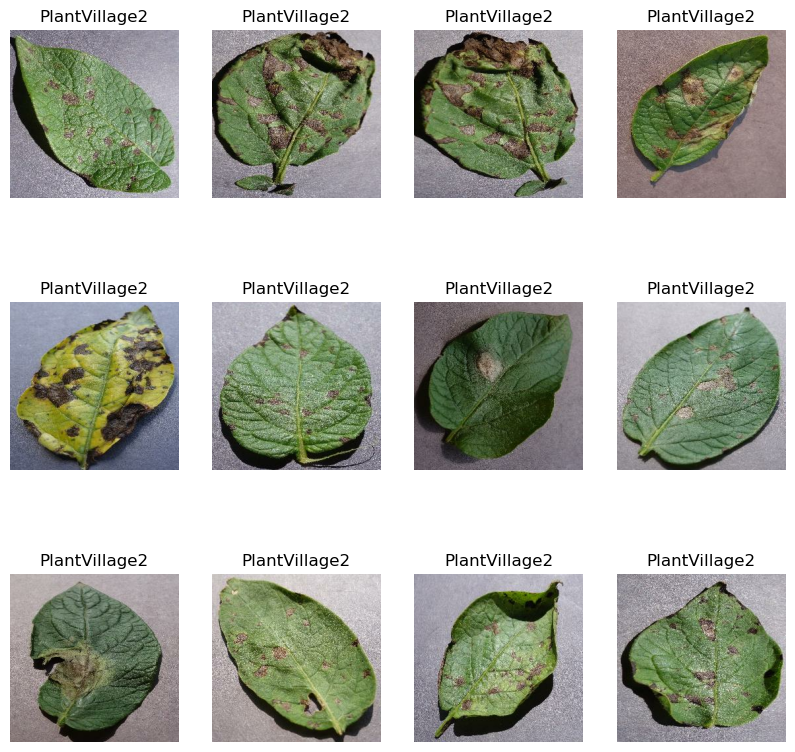

In [13]:
#Visualize some of the images from our dataset
plt.figure(figsize=(10, 10))
for image_batch, labels_batch in dataset.take(1):
    for i in range(12):
        ax = plt.subplot(3, 4, i + 1)
        plt.imshow(image_batch[i].numpy().astype("uint8"))
        plt.title(class_names[labels_batch[i]])
        plt.axis("off")

In [14]:
'''Function to Split Dataset
Dataset should be bifurcated into 3 subsets, namely:

Training: Dataset to be used while training
Validation: Dataset to be tested against while training
Test: Dataset to be tested against after we trained a model'''



'Function to Split Dataset\nDataset should be bifurcated into 3 subsets, namely:\n\nTraining: Dataset to be used while training\nValidation: Dataset to be tested against while training\nTest: Dataset to be tested against after we trained a model'

In [15]:
print("The Length of the Actual DataSet is : " , len(dataset))

The Length of the Actual DataSet is :  68


In [16]:
'''Function to split the Dataset into 
   1. Training Dataset(80%) 
   2. Testing DataSet(10%)
   3. Validation DataSet(10%)'''


def get_dataset_partitions_tf(ds, train_split=0.8, val_split=0.1, test_split=0.1, shuffle=True, shuffle_size=10000):
    assert (train_split + test_split + val_split) == 1
    
    ds_size = len(ds)
    
    if shuffle:
        ds = ds.shuffle(shuffle_size, seed=12)
    
    train_size = int(train_split * ds_size)
    val_size = int(val_split * ds_size)
    
    train_ds = ds.take(train_size)    
    val_ds = ds.skip(train_size).take(val_size)
    test_ds = ds.skip(train_size).skip(val_size)
    
    return train_ds, val_ds, test_ds

In [17]:
train_ds, val_ds, test_ds = get_dataset_partitions_tf(dataset)

In [18]:
print("The Length of the Training DataSet is : " , len(train_ds))
print("The Length of the Testing DataSet is : " , len(test_ds))
print("The Length of the Validation DataSet is : " , len(val_ds))

The Length of the Training DataSet is :  54
The Length of the Testing DataSet is :  8
The Length of the Validation DataSet is :  6


In [19]:
'''Cache, Shuffle, and Prefetch the Dataset'''
train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
val_ds = val_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
test_ds = test_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)

In [20]:
'''Building the Model
Creating a Layer for Resizing and Normalization
Before we feed our images to network, we should be resizing it to the desired size. 
Moreover, to improve model performance, we should normalize the image pixel value (keeping them in range 0 and 1 by dividing by 256). 
This should happen while training as well as inference. Hence we can add that as a layer in our Sequential Model.
You might be thinking why do we need to resize (256,256) image to again (256,256). 
You are right we don't need to but this will be useful when we are done with the training and start using the model for predictions. 
At that time somone can supply an image that is not (256,256) and this layer will resize it'''

"Building the Model\nCreating a Layer for Resizing and Normalization\nBefore we feed our images to network, we should be resizing it to the desired size. \nMoreover, to improve model performance, we should normalize the image pixel value (keeping them in range 0 and 1 by dividing by 256). \nThis should happen while training as well as inference. Hence we can add that as a layer in our Sequential Model.\nYou might be thinking why do we need to resize (256,256) image to again (256,256). \nYou are right we don't need to but this will be useful when we are done with the training and start using the model for predictions. \nAt that time somone can supply an image that is not (256,256) and this layer will resize it"

In [22]:
'''This code defines a TensorFlow Keras sequential model named resize_and_rescale. 
This model consists of two preprocessing layers: Resizing and Rescaling.'''

''' 1. layers.experimental.preprocessing.Resizing(IMAGE_SIZE, IMAGE_SIZE): This layer resizes the input images to a specified size. 
Here, IMAGE_SIZE is a variable representing the desired size of the images. 
By providing IMAGE_SIZE as both width and height parameters, it ensures that the images will be resized to a square shape.'''

''' 2. layers.experimental.preprocessing.Rescaling(1./255): This layer rescales the pixel values of the input images. 
It divides each pixel value by 255,which effectively scales down the pixel values from the range [0, 255] to the range [0, 1]. 
This is a common preprocessing step in deep learning models, as it helps to normalize the input data and makes training more stable.'''

''' 3. The tf.keras.Sequential wrapper is used to stack these preprocessing layers sequentially, 
so that the input images will first be resized and then rescaled before being passed to the next layers in the model. 
This preprocessing pipeline is often used in image classification tasks to prepare the data for training neural networks.'''

resize_and_rescale = tf.keras.Sequential([
    layers.Resizing(IMAGE_SIZE, IMAGE_SIZE),
    layers.Rescaling(1./255),
])

'''The normalization used in Rescaling is called min-max normalization or (scaling to a range). 
It scales the values linearly to a range, typically [0, 1] or [-1, 1], depending on the scale factor provided. 
In this case, it scales to [0, 1] by dividing each pixel value by 255.'''

'The normalization used in Rescaling is called min-max normalization or (scaling to a range). \nIt scales the values linearly to a range, typically [0, 1] or [-1, 1], depending on the scale factor provided. \nIn this case, it scales to [0, 1] by dividing each pixel value by 255.'

In [25]:
'''Data Augmentation
Data Augmentation is needed when we have less data, this boosts the accuracy of our model by augmenting the data.'''


''' Data Augmentation Pipeline:

1. layers.experimental.preprocessing.RandomFlip("horizontal_and_vertical"): This layer randomly flips the input images horizontally and vertically. 
By specifying "horizontal_and_vertical", it indicates that the images may be flipped both horizontally and vertically during training.

2. layers.experimental.preprocessing.RandomRotation(0.2): This layer randomly rotates the input images by a maximum of 0.2 radians. 
The rotation angle is randomly chosen within the specified range. 
This helps to increase the robustness of the model to variations in orientation.
'''

'''
  1. train_ds.map(...): This line applies the data augmentation pipeline defined above to each sample in the training dataset (train_ds). 
  The map function allows you to apply a function (in this case, a lambda function) to each element of the dataset.
  
  2. lambda x, y: (data_augmentation(x, training=True), y): This lambda function takes an input image x and its corresponding label y and applies the data augmentation pipeline (data_augmentation) to the image. 
  The training=True argument ensures that the augmentation layers behave differently during training compared to inference. 
  This is important because some augmentation techniques, like dropout or batch normalization, 
  behave differently during training and inference to prevent overfitting.
  
  3. prefetch(buffer_size=tf.data.AUTOTUNE): This prefetches elements from the dataset in the background while the model is executing training steps. 
  tf.data.AUTOTUNE dynamically adjusts the buffer size based on available system resources to optimize performance.

'''

data_augmentation = tf.keras.Sequential([
    layers.RandomFlip("horizontal_and_vertical"),
    layers.RandomRotation(0.2),
])

# Applying Data Augmentation to Train Dataset
train_ds = train_ds.map(
    lambda x, y: (data_augmentation(x, training=True), y)
).prefetch(buffer_size=tf.data.AUTOTUNE)

In [26]:
'''Model Architecture
We use a CNN coupled with a Softmax activation in the output layer. We also add the initial layers for resizing, normalization and Data Augmentation.

We are going to use convolutional neural network (CNN) here.'''

'Model Architecture\nWe use a CNN coupled with a Softmax activation in the output layer. We also add the initial layers for resizing, normalization and Data Augmentation.\n\nWe are going to use convolutional neural network (CNN) here.'

In [27]:
'''
 In TensorFlow, tf.keras.Sequential is a class that allows you to create models layer-by-layer in a linear stack. 
 It's a convenient way to build simple models where each layer has exactly one input tensor and one output tensor.

Here's a breakdown of how it works:

Initialization: You initialize a Sequential model by calling tf.keras.Sequential().

Adding Layers: You can add layers to the model using the .add() method or by passing a list of layers to the Sequential constructor. 
For example:

model = tf.keras.Sequential([
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])
Layer Stacking: Layers are added sequentially, so the output of one layer becomes the input for the next layer.

Layer Configuration: When you add a layer, you specify its configuration, such as the number of units, activation function, kernel size, etc.

Model Compilation: After defining the model, you typically compile it with an optimizer, loss function, and metrics using the .compile() method.

Model Training: Once compiled, you can train the model on your data using the .fit() method.

Here's a simple example demonstrating the use of Sequential:

import tensorflow as tf
from tensorflow.keras import layers

# Define a Sequential model
model = tf.keras.Sequential([
    layers.Dense(64, activation='relu', input_shape=(784,)),
    layers.Dense(10, activation='softmax')
])

# Compile the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Print the model summary
model.summary()
This creates a simple feedforward neural network with one hidden layer and one output layer. 
The input shape for the first layer is (784,), indicating it expects inputs of shape (batch_size, 784). 
The output layer has 10 units with a softmax activation function, suitable for multi-class classification tasks.

Sequential is particularly useful for building straightforward models, 
but it's not as flexible as the Functional API, which allows for more complex architectures, 
including models with multiple inputs and outputs or models with shared layers.
'''

"\n In TensorFlow, tf.keras.Sequential is a class that allows you to create models layer-by-layer in a linear stack. \n It's a convenient way to build simple models where each layer has exactly one input tensor and one output tensor.\n\nHere's a breakdown of how it works:\n\nInitialization: You initialize a Sequential model by calling tf.keras.Sequential().\n\nAdding Layers: You can add layers to the model using the .add() method or by passing a list of layers to the Sequential constructor. \nFor example:\n\nmodel = tf.keras.Sequential([\n    layers.Dense(64, activation='relu'),\n    layers.Dense(10, activation='softmax')\n])\nLayer Stacking: Layers are added sequentially, so the output of one layer becomes the input for the next layer.\n\nLayer Configuration: When you add a layer, you specify its configuration, such as the number of units, activation function, kernel size, etc.\n\nModel Compilation: After defining the model, you typically compile it with an optimizer, loss function, a

In [28]:
'''This code defines a convolutional neural network (CNN) model using TensorFlow's Keras API. Let's break down the code step by step:

Defining Input Shape and Number of Classes:

input_shape = (BATCH_SIZE, IMAGE_SIZE, IMAGE_SIZE, CHANNELS): This variable specifies the shape of the input data. 
BATCH_SIZE represents the number of samples in each batch, 
IMAGE_SIZE specifies the height and width of the input images, and 
CHANNELS represents the number of color channels in the images (e.g., 3 for RGB images).

n_classes = 3: This variable represents the number of classes in the classification task.


Building the Model:

1.model = models.Sequential([...]): This creates a sequential model where layers are added sequentially.
2.resize_and_rescale: This is the preprocessing pipeline defined earlier, which resizes and rescales the input images.
3.layers.Conv2D: These are convolutional layers that apply convolution operations to the input data. 
[Convolutional Operations : 
Convolution operations is the first and one of the most important step in the functioning of a CNN. 
Convolution operation focuses on extracting/preserving important features from the input (image etc).
All these kernels, input channels etc are the hyper parameters. The result of each layer is passed on to the next one.]

Each Conv2D layer has parameters such as the number of 
a.filters (e.g., 32, 64), 
b.kernel size (e.g., (3,3)), [A kernel can be defined as a function or a method that allows the application of linear methods to real-world problems that are nonlinear in nature. 
It does this by transforming data into higher dimensional spaces without explicitly computing in the high-dimensional feature space.]
and 
c.activation function (e.g., 'relu').

4.layers.MaxPooling2D: These layers perform max pooling operations to reduce the spatial dimensions of the input data.
5.layers.Flatten(): This layer flattens the input data into a 1D array, which is required before passing it to fully connected layers.
6.layers.Dense: These are fully connected layers (also called dense layers) that apply linear operations to the input data followed by an activation function.
7.The last Dense layer has n_classes neurons with softmax activation, which is typically used for multi-class classification tasks. It outputs a probability distribution over the classes.

Model Compilation:

The model does not explicitly compile in this code snippet. Compilation involves specifying the optimizer, loss function, and metrics for training. After compilation, the model can be trained using the fit method on training data.
Model Building:

model.build(input_shape=input_shape): This line builds the Keras model, specifying its input shape.
Since a Sequential model is used, the input shape only needs to be specified once, 
and the shapes of intermediate layers are inferred automatically from the shape of the previous layer's output.
'''

"This code defines a convolutional neural network (CNN) model using TensorFlow's Keras API. Let's break down the code step by step:\n\nDefining Input Shape and Number of Classes:\n\ninput_shape = (BATCH_SIZE, IMAGE_SIZE, IMAGE_SIZE, CHANNELS): This variable specifies the shape of the input data. \nBATCH_SIZE represents the number of samples in each batch, \nIMAGE_SIZE specifies the height and width of the input images, and \nCHANNELS represents the number of color channels in the images (e.g., 3 for RGB images).\n\nn_classes = 3: This variable represents the number of classes in the classification task.\n\n\nBuilding the Model:\n\n1.model = models.Sequential([...]): This creates a sequential model where layers are added sequentially.\n2.resize_and_rescale: This is the preprocessing pipeline defined earlier, which resizes and rescales the input images.\n3.layers.Conv2D: These are convolutional layers that apply convolution operations to the input data. \n[Convolutional Operations : \nCo

In [29]:
input_shape = (BATCH_SIZE, IMAGE_SIZE, IMAGE_SIZE, CHANNELS)
n_classes = 3

model = models.Sequential([
    resize_and_rescale,
    layers.Conv2D(32, kernel_size = (3,3), activation='relu', input_shape=input_shape),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64,  kernel_size = (3,3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64,  kernel_size = (3,3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(n_classes, activation='softmax'),
])

model.build(input_shape=input_shape)




'''The reason for using different activation functions in convolutional layers (ReLU) compared to the final dense layer (softmax) is due to the nature of the layers and the requirements of the task.'''

'''Convolutional Layers(layers.Conv2D()):

1.Convolutional layers are responsible for learning spatial hierarchies of features within the input images.
2.ReLU (Rectified Linear Unit) is commonly used as an activation function in convolutional layers. 
3.It introduces non-linearity to the network and helps in learning complex patterns in the data.
4.ReLU is preferred in convolutional layers because it helps in overcoming the vanishing gradient problem during training and is computationally efficient.'''

'''Dense Layers(layers.Dense())
1.The final dense layer is often used to produce the output of the model. In classification tasks like this one, the dense layer typically outputs class probabilities.
2.Softmax activation function is commonly used in the output layer of classification models. 
It normalizes the output values into a probability distribution over multiple classes, ensuring that the output values sum up to 1.
3.Softmax is suitable for multi-class classification problems because it converts the raw scores (logits) into probabilities, 
making it easier to interpret the model's predictions.'''

'''In summary, ReLU is used in convolutional layers to introduce non-linearity and learn spatial features, 
while softmax is used in the dense layer to produce class probabilities for the multi-class classification task. 
Each activation function is chosen based on its suitability for the specific type of layer and its role within the neural network architecture.'''

C:\Users\KIIT\AppData\Roaming\Python\Python310\site-packages\keras\src\layers\convolutional\base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


'In summary, ReLU is used in convolutional layers to introduce non-linearity and learn spatial features, \nwhile softmax is used in the dense layer to produce class probabilities for the multi-class classification task. \nEach activation function is chosen based on its suitability for the specific type of layer and its role within the neural network architecture.'

In [30]:
'''Basically we have a Number of Activation Functions present in Deep Learning and in the DL Frameworks
Likewise we have 
 1. Sigmoid Function : Usually used in output layer of a binary classification, where result is either 0 or 1, 
 as value for sigmoid function lies between 0 and 1 only so, 
 result can be predicted easily to be 1 if value is greater than 0.5 and 0 otherwise.
 
 2. tanh(x) function : Usually used in hidden layers of a neural network as it’s values lies between -1 to 1 
 hence the mean for the hidden layer comes out be 0 or very close to it, 
 hence helps in centering the data by bringing mean close to 0. This makes learning for the next layer much easier
 
 3. ReLU function (A(x) = max(0,x). It gives an output x if x is positive and 0 otherwise.) : ReLu is less computationally expensive than tanh and sigmoid because it involves simpler mathematical operations. 
 At a time only a few neurons are activated making the network sparse making it efficient and easy for computation.
 
 4. SoftMax function : Usually used when trying to handle multiple classes. the softmax function was commonly found in the output layer of image classification problems.
 The softmax function would squeeze the outputs for each class between 0 and 1 
 and would also divide by the sum of the outputs. '''


''' Reasons to use SoftMax Over Sigmoid Function 
 a. Sigmoid Function : 
 
.Range: The sigmoid function maps its input to a value between 0 and 1, which can be interpreted as a probability.
.Output Interpretation: It's commonly used in binary classification problems where the output is interpreted as the probability of the input belonging to one of the two classes.
.Single Output: Sigmoid is typically used in the output layer of binary classification models where there is only one output neuron.

b. SoftMax Function : 

.Range: The softmax function is a generalization of the sigmoid function to multiple classes. 
It takes a vector of arbitrary real-valued scores and normalizes them into a probability distribution 
where the sum of the probabilities of all classes equals 1.
.Output Interpretation: It's commonly used in multi-class classification problems where the model needs to output probabilities for each class.
.Multiple Outputs: Softmax is used in the output layer of multi-class classification models where there are multiple output neurons, one for each class.'''



" Reasons to use SoftMax Over Sigmoid Function \n a. Sigmoid Function : \n \n.Range: The sigmoid function maps its input to a value between 0 and 1, which can be interpreted as a probability.\n.Output Interpretation: It's commonly used in binary classification problems where the output is interpreted as the probability of the input belonging to one of the two classes.\n.Single Output: Sigmoid is typically used in the output layer of binary classification models where there is only one output neuron.\n\nb. SoftMax Function : \n\n.Range: The softmax function is a generalization of the sigmoid function to multiple classes. \nIt takes a vector of arbitrary real-valued scores and normalizes them into a probability distribution \nwhere the sum of the probabilities of all classes equals 1.\n.Output Interpretation: It's commonly used in multi-class classification problems where the model needs to output probabilities for each class.\n.Multiple Outputs: Softmax is used in the output layer of mu

In [31]:
model.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ sequential (Sequential)              │ (32, 256, 256, 3)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d (Conv2D)                      │ (32, 254, 254, 32)          │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (32, 127, 127, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (32, 125, 125, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (32, 62, 62, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (32, 60, 60, 64)            │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (32, 30, 30, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (32, 28, 28, 64)            │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (32, 14, 14, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_4 (Conv2D)                    │ (32, 12, 12, 64)            │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_4 (MaxPooling2D)       │ (32, 6, 6, 64)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ (32, 4, 4, 64)              │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_5 (MaxPooling2D)       │ (32, 2, 2, 64)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (32, 256)                   │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (32, 64)                    │          16,448 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (32, 3)                     │             195 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 183,747 (717.76 KB)

 Trainable params: 183,747 (717.76 KB)

 Non-trainable params: 0 (0.00 B)

In [32]:
'''Compiling the Model
We use adam Optimizer, SparseCategoricalCrossentropy for losses, accuracy as a metric'''


'Compiling the Model\nWe use adam Optimizer, SparseCategoricalCrossentropy for losses, accuracy as a metric'

In [33]:
model.compile(
    optimizer='adam',
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
    metrics=['accuracy']
)

In [34]:
#Training the Model
history = model.fit(
    train_ds,
    batch_size=BATCH_SIZE,
    validation_data=val_ds,
    verbose=1,
    epochs=80,
)

Epoch 1/80
54/54 ━━━━━━━━━━━━━━━━━━━━ 41s 657ms/step - accuracy: 0.9165 - loss: 0.2188 - val_accuracy: 1.0000 - val_loss: 0.0000e+00
Epoch 2/80
54/54 ━━━━━━━━━━━━━━━━━━━━ 36s 657ms/step - accuracy: 1.0000 - loss: 0.0000e+00 - val_accuracy: 1.0000 - val_loss: 0.0000e+00
Epoch 3/80
54/54 ━━━━━━━━━━━━━━━━━━━━ 40s 733ms/step - accuracy: 1.0000 - loss: 0.0000e+00 - val_accuracy: 1.0000 - val_loss: 0.0000e+00
Epoch 4/80
54/54 ━━━━━━━━━━━━━━━━━━━━ 45s 834ms/step - accuracy: 1.0000 - loss: 0.0000e+00 - val_accuracy: 1.0000 - val_loss: 0.0000e+00
Epoch 5/80
54/54 ━━━━━━━━━━━━━━━━━━━━ 47s 869ms/step - accuracy: 1.0000 - loss: 0.0000e+00 - val_accuracy: 1.0000 - val_loss: 0.0000e+00
Epoch 6/80
54/54 ━━━━━━━━━━━━━━━━━━━━ 44s 816ms/step - accuracy: 1.0000 - loss: 0.0000e+00 - val_accuracy: 1.0000 - val_loss: 0.0000e+00
Epoch 7/80
54/54 ━━━━━━━━━━━━━━━━━━━━ 41s 760ms/step - accuracy: 1.0000 - loss: 0.0000e+00 - val_accuracy: 1.0000 - val_loss: 0.0000e+00
Epoch 8/80
54/54 ━━━━━━━━━━━━━━━━━━━━ 51s 934

Epoch 49/80
54/54 ━━━━━━━━━━━━━━━━━━━━ 38s 694ms/step - accuracy: 1.0000 - loss: 0.0000e+00 - val_accuracy: 1.0000 - val_loss: 0.0000e+00
Epoch 50/80
54/54 ━━━━━━━━━━━━━━━━━━━━ 38s 695ms/step - accuracy: 1.0000 - loss: 0.0000e+00 - val_accuracy: 1.0000 - val_loss: 0.0000e+00
Epoch 51/80
54/54 ━━━━━━━━━━━━━━━━━━━━ 42s 780ms/step - accuracy: 1.0000 - loss: 0.0000e+00 - val_accuracy: 1.0000 - val_loss: 0.0000e+00
Epoch 52/80
54/54 ━━━━━━━━━━━━━━━━━━━━ 38s 695ms/step - accuracy: 1.0000 - loss: 0.0000e+00 - val_accuracy: 1.0000 - val_loss: 0.0000e+00
Epoch 53/80
54/54 ━━━━━━━━━━━━━━━━━━━━ 43s 788ms/step - accuracy: 1.0000 - loss: 0.0000e+00 - val_accuracy: 1.0000 - val_loss: 0.0000e+00
Epoch 54/80
54/54 ━━━━━━━━━━━━━━━━━━━━ 38s 701ms/step - accuracy: 1.0000 - loss: 0.0000e+00 - val_accuracy: 1.0000 - val_loss: 0.0000e+00
Epoch 55/80
54/54 ━━━━━━━━━━━━━━━━━━━━ 43s 794ms/step - accuracy: 1.0000 - loss: 0.0000e+00 - val_accuracy: 1.0000 - val_loss: 0.0000e+00
Epoch 56/80
54/54 ━━━━━━━━━━━━━━━━

In [35]:
scores=model.evaluate(train_ds)

54/54 ━━━━━━━━━━━━━━━━━━━━ 16s 284ms/step - accuracy: 1.0000 - loss: 0.0000e+00


In [ ]:
'''You can see above that we get 99.71% accuracy for our training dataset. This is considered to be a pretty good accuracy"

In [36]:
scores = model.evaluate(test_ds)

8/8 ━━━━━━━━━━━━━━━━━━━━ 2s 157ms/step - accuracy: 1.0000 - loss: 0.0000e+00


In [ ]:
'''You can see above that we get 97.66% accuracy for our test dataset. This is considered to be a pretty good accuracy"

In [37]:
scores=model.evaluate(val_ds)

6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 152ms/step - accuracy: 1.0000 - loss: 0.0000e+00


In [39]:
'''You can see above that we get 98.44% accuracy for our test dataset. This is considered to be a pretty good accuracy'''

'You can see above that we get 98.44% accuracy for our test dataset. This is considered to be a pretty good accuracy'

In [21]:
'''Scores is just a list containing loss and accuracy value'''
scores

[0.026763340458273888, 0.984375]

In [ ]:
'''Here Loss is 2.67% approximately and accuracy is 98.43%'''

In [22]:
#Plotting the Accuracy and Loss Curves
history

In [23]:
history.params

{'verbose': 1, 'epochs': 70, 'steps': 54}

In [24]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

In [26]:
#loss, accuracy, val loss etc are a python list containing values of loss, accuracy etc at the end of each epoch

type(history.history['loss'])

list

In [27]:
len(history.history['loss'])

70

In [28]:
history.history['loss'][:5] # show loss for first 5 epochs

[0.9115248918533325,
 0.6980401277542114,
 0.45652106404304504,
 0.3520345091819763,
 0.31001153588294983]

In [29]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

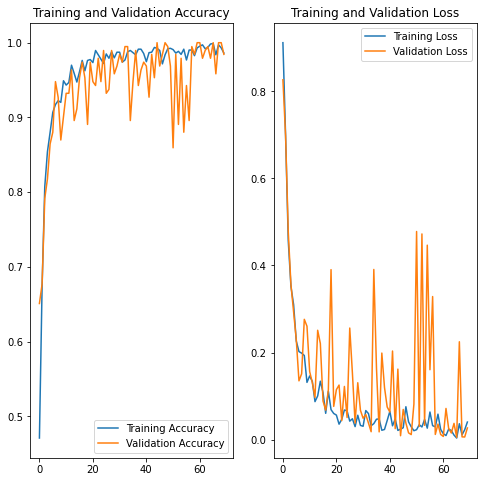

In [30]:
plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(range(EPOCHS), acc, label='Training Accuracy')
plt.plot(range(EPOCHS), val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(range(EPOCHS), loss, label='Training Loss')
plt.plot(range(EPOCHS), val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

first image to predict
actual label: Potato___Early_blight
1/1 [==============================] - 0s 235ms/step
predicted label: Potato___Early_blight


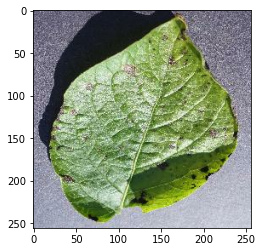

In [43]:
#Run Prediction on a Sample Image 
import numpy as np
for images_batch, labels_batch in test_ds.take(1):
    
    first_image = images_batch[0].numpy().astype('uint8')
    first_label = labels_batch[0].numpy()
    
    print("first image to predict")
    plt.imshow(first_image)
    print("actual label:",class_names[first_label])
    
    batch_prediction = model.predict(images_batch)
    print("predicted label:",class_names[np.argmax(batch_prediction[0])])

In [45]:
#Function for Inference 
def predict(model, img):
    img_array = tf.keras.preprocessing.image.img_to_array(images[i].numpy())
    img_array = tf.expand_dims(img_array, 0)

    predictions = model.predict(img_array)

    predicted_class = class_names[np.argmax(predictions[0])]
    confidence = round(100 * (np.max(predictions[0])), 2)
    return predicted_class, confidence

1/1 [==============================] - 0s 31ms/step


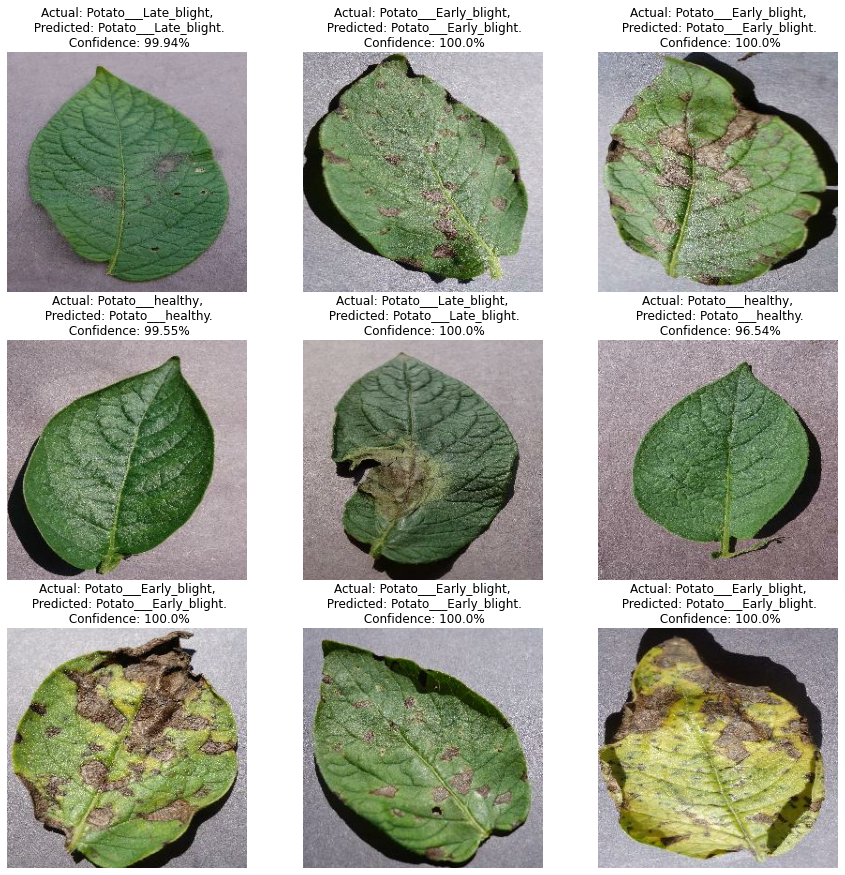

In [53]:
#Run Prediction on Few Sample Images
plt.figure(figsize=(15, 15))
for images, labels in test_ds.take(1):
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        
        predicted_class, confidence = predict(model, images[i].numpy())
        actual_class = class_names[labels[i]] 
        
        plt.title(f"Actual: {actual_class},\n Predicted: {predicted_class}.\n Confidence: {confidence}%")
        
        plt.axis("off")